# Task 2 - Feature Engineering I

Before creating logistic regression models with the NHL data, we want to add and tidy up some existing features to our dataset.

In [2]:
from ift6758.data.nhl_data_parser import NHLDataParser
data_parser = NHLDataParser()

We want to separate the dataset into two subsets, a training & validation set (2016-2017 to 2019-2020) and a test set (2020-2021). These datasets will contain games only from the regular season.

In [3]:
train_df = data_parser.get_shot_and_goal_pbp_df_for_seasons(2016, 2018, with_playoff_season=False)
validation_df = data_parser.get_shot_and_goal_pbp_df_for_season(2019, with_playoff_season=False)
test_df = data_parser.get_shot_and_goal_pbp_df_for_season(2020, with_playoff_season=False)

We now want to visualize our dataset (2016-17 to 2019-20) to see if we can find anything interesting.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = data_parser.get_shot_and_goal_pbp_df_for_seasons(2016, 2019, with_playoff_season=False)

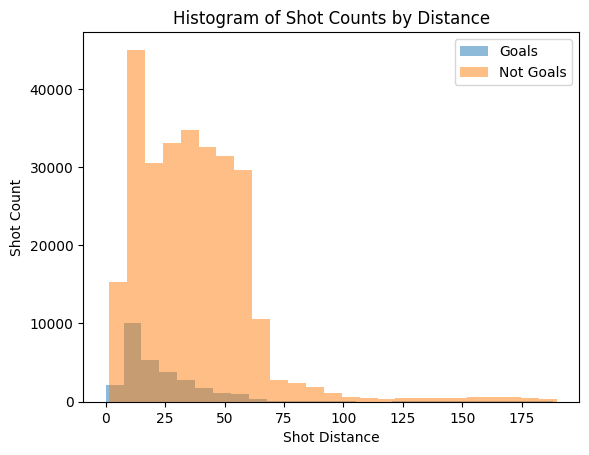

In [5]:
goals_df = df[df['isGoal'] == 1]
not_goals_df = df[df['isGoal'] == 0]

plt.hist(goals_df['shotDistance'], bins=25, alpha=0.5, label='Goals')
plt.hist(not_goals_df['shotDistance'], bins=25, alpha=0.5, label='Not Goals')
plt.xlabel('Shot Distance')
plt.ylabel('Shot Count')
plt.title('Histogram of Shot Counts by Distance')
plt.legend()
plt.show()

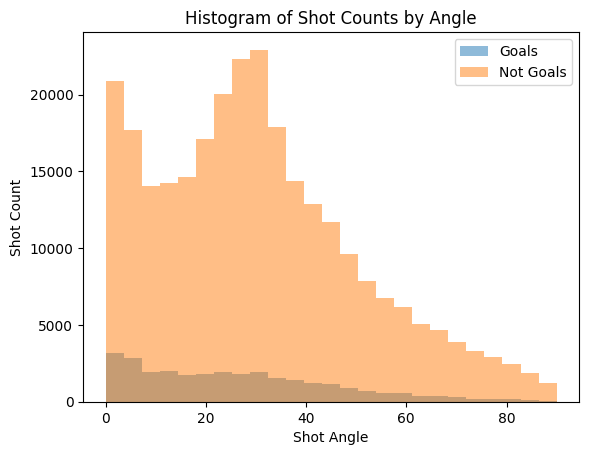

In [6]:
plt.hist(goals_df['shotAngle'], bins=25, alpha=0.5, label='Goals')
plt.hist(not_goals_df['shotAngle'], bins=25, alpha=0.5, label='Not Goals')
plt.xlabel('Shot Angle')
plt.ylabel('Shot Count')
plt.title('Histogram of Shot Counts by Angle')
plt.legend()
plt.show()

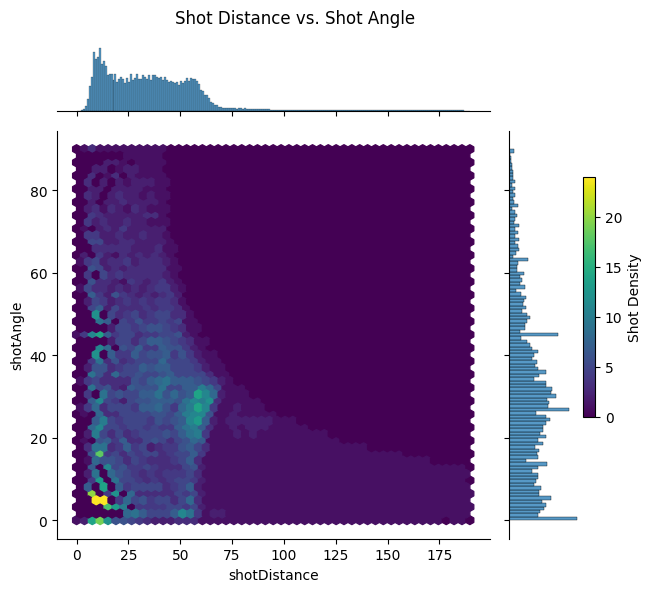

In [7]:
g = sns.jointplot(x='shotDistance', y='shotAngle', data=df, kind='hex', cmap='viridis', bins=25)
plt.suptitle('Shot Distance vs. Shot Angle')
plt.tight_layout()

cax = g.fig.add_axes([0.98, 0.3, 0.02, 0.4])
plt.colorbar(g.ax_joint.collections[0], cax=cax, label='Shot Density')

plt.show()

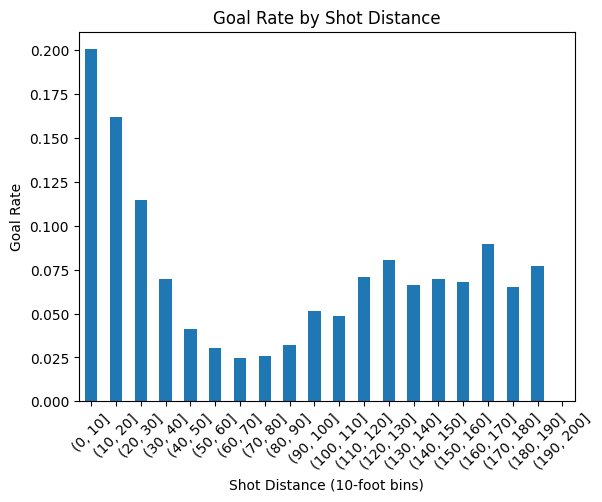

In [8]:
distance_bins = np.arange(0, 201, 10)
df['distance_bin'] = pd.cut(df['shotDistance'], bins=distance_bins)
goal_rate_distance = df.groupby('distance_bin')['isGoal'].mean()

goal_rate_distance.plot(kind='bar')
plt.xlabel('Shot Distance (10-foot bins)')
plt.ylabel('Goal Rate')
plt.title('Goal Rate by Shot Distance')
plt.xticks(rotation=45)
plt.show()

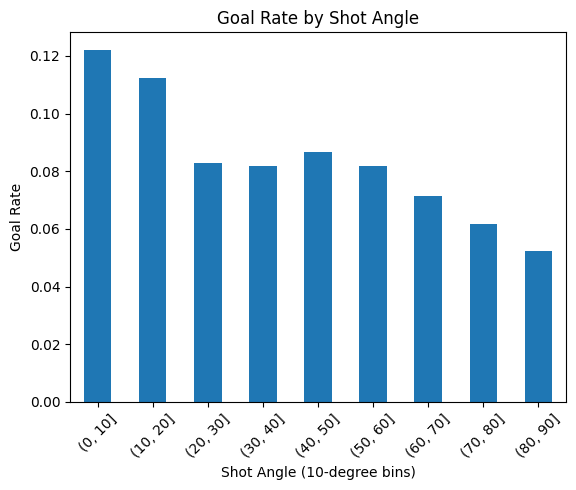

In [9]:
angle_bins = np.arange(0, 91, 10)
df['angle_bin'] = pd.cut(df['shotAngle'], bins=angle_bins)
goal_rate_by_angle = df.groupby('angle_bin')['isGoal'].mean()

goal_rate_by_angle.plot(kind='bar')
plt.xlabel('Shot Angle (10-degree bins)')
plt.ylabel('Goal Rate')
plt.title('Goal Rate by Shot Angle')
plt.xticks(rotation=45)
plt.show()

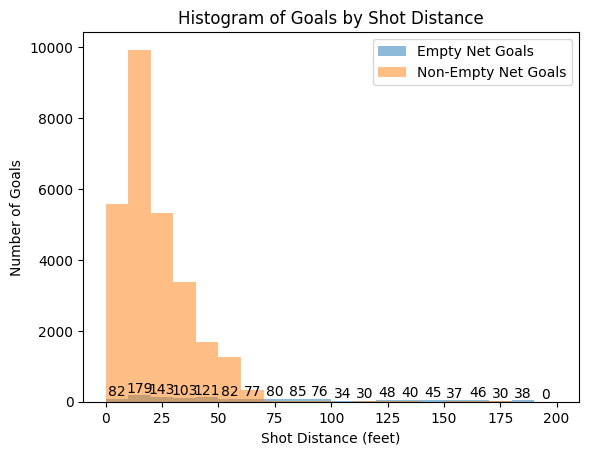

In [10]:
empty_net_goals = goals_df[goals_df['emptyNet'] == 1]
non_empty_net_goals = goals_df[goals_df['emptyNet'] == 0]

empty_net_hist = plt.hist(empty_net_goals['shotDistance'], bins=distance_bins, alpha=0.5, label='Empty Net Goals')
plt.hist(non_empty_net_goals['shotDistance'], bins=distance_bins, alpha=0.5, label='Non-Empty Net Goals')

for i in range(len(empty_net_hist[0])):
    plt.text(empty_net_hist[1][i] + (empty_net_hist[1][i + 1] - empty_net_hist[1][i]) / 2,
             empty_net_hist[0][i] + 1,
             str(int(empty_net_hist[0][i])),
             ha='center', va='bottom')

plt.xlabel('Shot Distance (feet)')
plt.ylabel('Number of Goals')
plt.title('Histogram of Goals by Shot Distance')
plt.legend()
plt.show()

In [15]:
testing = data_parser.get_shot_and_goal_pbp_df(2016020094)
testing

,gameId,timeRemaining,periodNumber,timeInPeriod,isGoal,shotType,emptyNet,xCoord,yCoord,zoneCode,...,shootingPlayer,goalieInNet,previousEvent,timeDiff,previousEventX,previousEventY,rebound,distanceDiff,shotAngleDiff,speed
4,2016020094,1144,1,00:56,0,snap,0,-39.0,13.0,O,...,Andrew Ladd,Al Montoya,missed-shot,10.0,-44.0,24.0,0,12.083046,0.000000,1.208305
7,2016020094,1118,1,01:22,0,wrist,0,86.0,-10.0,O,...,Tomas Plekanec,Thomas Greiss,takeaway,11.0,-49.0,31.0,0,141.088625,0.000000,12.826239
37,2016020094,754,1,07:26,0,slap,0,-32.0,31.0,O,...,Travis Hamonic,Al Montoya,stoppage,0.0,NaN,NaN,0,NaN,0.000000,5.415952
42,2016020094,692,1,08:28,0,wrap-around,0,-83.0,4.0,O,...,Brock Nelson,Al Montoya,stoppage,-4.0,NaN,NaN,0,NaN,0.000000,5.415952
46,2016020094,666,1,08:54,0,tip-in,0,34.0,15.0,O,...,Phillip Danault,Thomas Greiss,stoppage,0.0,NaN,NaN,0,NaN,0.000000,5.415952
48,2016020094,603,1,09:57,0,wrist,0,65.0,2.0,O,...,Alex Galchenyuk,Thomas Greiss,faceoff,63.0,69.0,22.0,0,20.396078,0.000000,0.323747
56,2016020094,554,1,10:46,0,slap,0,-48.0,1.0,O,...,Nick Leddy,Al Montoya,stoppage,-1.0,NaN,NaN,0,NaN,0.000000,5.415952
65,2016020094,461,1,12:19,0,wrist,0,-71.0,-38.0,O,...,Thomas Hickey,Al Montoya,stoppage,0.0,NaN,NaN,0,NaN,0.000000,5.415952
67,2016020094,462,1,12:18,0,backhand,0,-87.0,-6.0,O,...,Anthony Beauvillier,Al Montoya,faceoff,-1.0,-69.0,-22.0,0,24.083189,0.000000,5.415952
71,2016020094,383,1,13:37,0,wrist,0,-84.0,-20.0,O,...,Casey Cizikas,Al Montoya,stoppage,0.0,NaN,NaN,0,NaN,0.000000,5.415952
